In [3]:
 # Conect to google drive
# [Do not modified this code]
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download ImageBind
# [Do not modified this code]
%cd /content/drive/MyDrive/AI_HW1
!git clone https://github.com/facebookresearch/ImageBind.git

/content/drive/MyDrive/AI_HW1
fatal: destination path 'ImageBind' already exists and is not an empty directory.


In [ ]:
# Build Environment
# [Do not modified this code]
%cd ./ImageBind
!pip install torch==2.0.1
!pip install .

[Errno 2] No such file or directory: './ImageBind'
/content/drive/MyDrive/AI_HW1/ImageBind
Processing /content/drive/MyDrive/AI_HW1/ImageBind
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 28fe037d212663c6a24f373b94cc5d478c8c1a1d) to /tmp/pip-install-psami3yy/pytorchvideo_79a403bf405f4a1d8c9ab745c68c1cb3
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-install-psami3yy/pytorchvideo_79a403bf405f4a1d8c9ab745c68c1cb3
  Running command git rev-parse -q --verify 'sha^28fe037d212663c6a24f373b94cc5d478c8c1a1d'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Running command git checkout -q 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Preparing metadata (setup.py) ... do

In [7]:
# Load Model
# [Do not modify this code]

%cd /content/drive/MyDrive/AI_HW1/ImageBind
!pip install pytorchvideo
!pip install ftfy
!pip install timm
!pip install einops

from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

/content/drive/MyDrive/AI_HW1/ImageBind
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytorchvideo: filename=pytorchvideo-0.1.5-py3-none-any.whl size=188685 sha256=269a272e7f12806264622baa72e4fd3bb44b1c5c13e13d7b4b119025fd15ca19
  Stored in directory: /root/.cache/pip/wheels/ff/4e/81/0f72a543be9ed7eb737c95bfc5da4025e73226b44368074ece
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=5697124eeb33f21d87b9183823e086b237170f37706847f5b728e89d6b78010b
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


100%|██████████| 4.47G/4.47G [01:14<00:00, 64.4MB/s]


ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [ ]:
# Sample Code
text_list=["A dog", "A car", "A bird"]
image_paths=[".assets/dog_image.jpg", ".assets/car_image.jpg", ".assets/bird_image.jpg"]
audio_paths=[".assets/dog_audio.wav", ".assets/car_audio.wav", ".assets/bird_audio.wav"]

inputs = {
    ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
    ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
}

with torch.no_grad():
    embeddings = model(inputs)

print(
    "Vision x Text: ",
    torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1),
)
print(
    "Audio x Text: ",
    torch.softmax(embeddings[ModalityType.AUDIO] @ embeddings[ModalityType.TEXT].T, dim=-1),
)
print(
    "Vision x Audio: ",
    torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.AUDIO].T, dim=-1),
)

# Expected output:
#
# Vision x Text:
# tensor([[9.9761e-01, 2.3694e-03, 1.8612e-05],
#         [3.3836e-05, 9.9994e-01, 2.4118e-05],
#         [4.7997e-05, 1.3496e-02, 9.8646e-01]])
#
# Audio x Text:
# tensor([[1., 0., 0.],
#         [0., 1., 0.],
#         [0., 0., 1.]])
#
# Vision x Audio:
# tensor([[0.8070, 0.1088, 0.0842],
#         [0.1036, 0.7884, 0.1079],
#         [0.0018, 0.0022, 0.9960]])

Vision x Text:  tensor([[9.8360e-01, 1.6274e-02, 1.2784e-04],
        [4.6024e-06, 9.9997e-01, 2.4119e-05],
        [1.3127e-05, 1.3497e-02, 9.8649e-01]], device='cuda:0')
Audio x Text:  tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')
Vision x Audio:  tensor([[0.8070, 0.1088, 0.0842],
        [0.1036, 0.7884, 0.1079],
        [0.0018, 0.0022, 0.9960]], device='cuda:0')


In [ ]:
# Refer to the above sample code, load the image data for the text, and and generates its embedding
import pandas as pd

file_path = '/content/drive/MyDrive/AI_HW1/'
text_list=["Dog", "Car", "Bird"]

# TODO: Choose one picture for each category and generates an embedding(5%)
# Please output the result as embeddings, like the sample code
image_paths=[ file_path+text_list[0]+"/image_001.jpg", file_path+text_list[1]+"/image_001.jpg", file_path+text_list[2]+"/image_001.jpg"]

inputs = {
    ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
}

with torch.no_grad():
    embeddings = model(inputs)

print(
    "Vision x Text: ",
    torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1),
)

Vision x Text:  tensor([[9.9974e-01, 2.5731e-04, 6.1573e-06],
        [9.8385e-05, 9.9986e-01, 3.8284e-05],
        [8.1904e-07, 9.1834e-07, 1.0000e+00]], device='cuda:0')
Audio x Text:  tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')
Vision x Audio:  tensor([[1.5110e-01, 2.8737e-02, 8.2016e-01],
        [8.2650e-03, 8.4849e-01, 1.4324e-01],
        [2.9872e-05, 3.3165e-04, 9.9964e-01]], device='cuda:0')


In [ ]:
# save　the embeddings
import pickle
with open('embeddings_0922.pickle', 'wb') as file:
    pickle.dump(embeddings, file)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/AI_HW1/ImageBind

import pickle
# when embeddings is needed
with open('embeddings_0922.pickle', 'rb') as file:
    embeddings = pickle.load(file)

/content/drive/MyDrive/AI_HW1/ImageBind


In [8]:
# !pip install torch==2.0.1
# !pip install .

from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType
import pandas as pd


def build_dot_product_matrix(embeddings):
  # TODO: build 3*3 matrixes (inner product, softmax of inner product) of the pictures (5%)
  dot_product_matrix = embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T
  softmax_matrix = torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1),

  return dot_product_matrix, softmax_matrix[0]

dot_product_matrix, softmax_matrix = build_dot_product_matrix(embeddings) # The embedding that generates above

row_labels = ["Dog", "Car", "Bird"]
column_labels = ["Dog", "Car", "Bird"]

dot_product_pd = pd.DataFrame(dot_product_matrix.cpu().numpy(), index=row_labels, columns=column_labels)
softmax_matrix_pd = pd.DataFrame(softmax_matrix.cpu().numpy(), index=row_labels, columns=column_labels)

pd.options.display.float_format = '{:.8f}'.format

print("Dot Product Matrix:")
print(dot_product_pd)

print("Softmax Matrix:")
print(softmax_matrix_pd)

Dot Product Matrix:
             Dog         Car        Bird
Dog  24.35992432 16.09494781 12.36231804
Car   9.13704777 18.36353111  8.19318676
Bird 10.50400162 10.61843777 24.51913071
Softmax Matrix:
            Dog        Car       Bird
Dog  0.99973649 0.00025731 0.00000616
Car  0.00009839 0.99986327 0.00003828
Bird 0.00000082 0.00000092 0.99999821


In [ ]:
# Use cosine_similarity in sklearn to process the embeddings
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def build_dot_cosine_matrix(embeddings):
  #  TODO: build 3*3 matrixes (cosine similarity) of the pictures  (5%)
  result_cosine_matrix = cosine_similarity(embeddings[ModalityType.VISION].cpu(), embeddings[ModalityType.TEXT].cpu())
  return result_cosine_matrix

cosine_matrix = build_dot_cosine_matrix(embeddings) # The embedding that generates above

row_labels = ["Dog", "Car", "Bird"]
column_labels = ["Dog", "Car", "Bird"]

cosine_product_pd = pd.DataFrame(cosine_matrix, index=row_labels, columns=column_labels)

print("Cosine Product Matrix:")
print(cosine_product_pd)


Cosine Product Matrix:
            Dog        Car       Bird
Dog  0.24359924 0.16094951 0.12362319
Car  0.09137049 0.18363532 0.08193187
Bird 0.10504004 0.10618439 0.24519134


In [11]:
def load_data_from_folder(path):
  image_paths = []
  image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.webp']
  for root, dirs, files in os.walk(path):
    for file in files:
        _, extension = os.path.splitext(file)
        if extension.lower() in image_extensions:
            image_paths.append(os.path.join(root, file))
  return image_paths

In [12]:
import os
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# model = imagebind_model.imagebind_huge(pretrained=True)
# model.eval()
# model.to(device)

dog_folder_path = '/content/drive/MyDrive/AI_HW1/Dog'
car_folder_path = '/content/drive/MyDrive/AI_HW1/Car'
bird_folder_path = '/content/drive/MyDrive/AI_HW1/Bird'

dog_text = "Dog"
car_text = "Car"
bird_text = "Bird"

dog_image_paths = load_data_from_folder(dog_folder_path)
print(dog_image_paths)
car_image_paths = load_data_from_folder(car_folder_path)
bird_image_paths = load_data_from_folder(bird_folder_path)

# TODO: Transform Vision Data (3%)
# TODO: Transform Text Data (3%)


# TODO: Generate embeddings for each set of catogories data (4%)
dog_embeddings = []
for image_path in dog_image_paths:
    dog_inputs = {
    ModalityType.TEXT: data.load_and_transform_text(dog_text, device),
    ModalityType.VISION: data.load_and_transform_vision_data([image_path], device),
    }

    with torch.no_grad():
        embedding = model(dog_inputs)
        dog_embeddings.append(embedding)

dog_embeddings = np.array(dog_embeddings)
print(len(dog_embeddings))

car_embeddings = []
for image_path in car_image_paths:
    car_inputs = {
    ModalityType.TEXT: data.load_and_transform_text(car_text, device),
    ModalityType.VISION: data.load_and_transform_vision_data([image_path], device),
    }

    with torch.no_grad():
        embedding = model(car_inputs)
        car_embeddings.append(embedding)

car_embeddings = np.array(car_embeddings)
print(len(car_embeddings))

bird_embeddings = []
for image_path in bird_image_paths:
    bird_inputs = {
    ModalityType.TEXT: data.load_and_transform_text(bird_text, device),
    ModalityType.VISION: data.load_and_transform_vision_data([image_path], device),
    }

    with torch.no_grad():
        embedding = model(bird_inputs)
        bird_embeddings.append(embedding)

bird_embeddings = np.array(bird_embeddings)
print(len(bird_embeddings))

['/content/drive/MyDrive/AI_HW1/Dog/image_003.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_005.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_010.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_002.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_004.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_007.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_006.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_009.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_008.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_001.jpg']
10
10
10


[[-0.03044795  0.00209353  0.01168272 ...  0.04274828  0.00669835
   0.01462938]
 [-0.04888483 -0.02292984  0.00466948 ... -0.00210962  0.01726878
   0.01438465]
 [-0.03338646 -0.02851862  0.0061971  ...  0.00727116  0.01474715
   0.01021104]
 ...
 [-0.03179081 -0.03289419 -0.00138299 ...  0.00297725  0.01155705
  -0.01236649]
 [ 0.0084438  -0.03680404  0.02594535 ...  0.02231183  0.02370724
   0.02407025]
 [-0.00634704 -0.01987046  0.03845118 ...  0.01385444 -0.02177603
   0.00959224]]


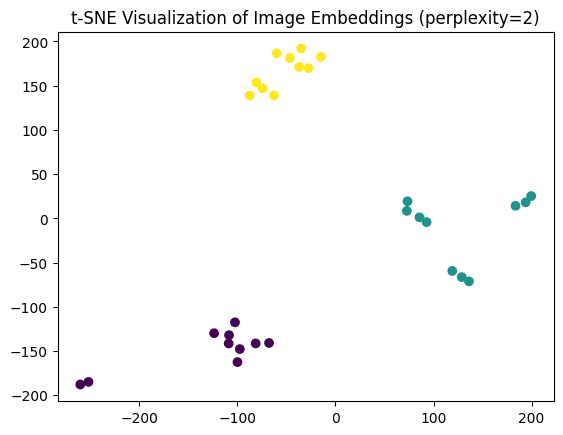

In [20]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# TODO: Implement TSNE (10%)
# [HINT] Use sk-learn tsne
# [HINT] Cat all the emnedding from each catafories together, and create a label list for them
# [HINT] Run TSNE and display the result

# Concatenate the embeddings
dog_vision_embeddings = np.concatenate([embedding['vision'].cpu().numpy() for embedding in dog_embeddings])
car_vision_embeddings = np.concatenate([embedding['vision'].cpu().numpy() for embedding in car_embeddings])
bird_vision_embeddings = np.concatenate([embedding['vision'].cpu().numpy() for embedding in bird_embeddings])

# Concatenate the vision embeddings along the rows
all_embeddings = np.concatenate((dog_vision_embeddings, car_vision_embeddings, bird_vision_embeddings), axis=0)
print(all_embeddings)

# Create labels for the embeddings based on their category (0 for dogs, 1 for cars, 2 for birds)
labels = np.concatenate((np.zeros(10), np.ones(10), 2*np.ones(10)))

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=2, random_state=0)  # You can adjust the number of components as needed

# Fit t-SNE to the concatenated embeddings
tsne_results = tsne.fit_transform(all_embeddings)

# Create a scatter plot
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels)
# plt.legend(labels=['Dog', 'Car', 'Bird'])

plt.title('t-SNE Visualization of Image Embeddings (perplexity=2)')
plt.show()




In [ ]:
# import numpy as np

# class PCA:
#     def __init__(self, n_components: int):
#         self.n_components = n_components
#         self.mean = None
#         self.components = None

#     def fit(self, X: np.ndarray):
#         # TODO: 10%
#         # [Hint] Calculate covariance matrix and its eigenvalues and eigenvectors

#     def transform(self, X: np.ndarray) -> np.ndarray:
#         # TODO: 5%
#         # [Hint] Use the priciple components calculated in the previous method the project the transformed data

import numpy as np

class PCA:
    def __init__(self, n_components: int):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit(self, X: np.ndarray):
        # TODO: 10%
        # [Hint] Calculate covariance matrix and its eigenvalues and eigenvectors
        self.mean = np.mean(X, axis=0)
        centered_data = X - self.mean
        covariance_matrix = np.cov(centered_data, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X: np.ndarray) -> np.ndarray:
        # TODO: 5%
        # [Hint] Use the priciple components calculated in the previous method the project the transformed data
        centered_data = X - self.mean
        transformed_data = np.dot(centered_data, self.components)
        return transformed_data

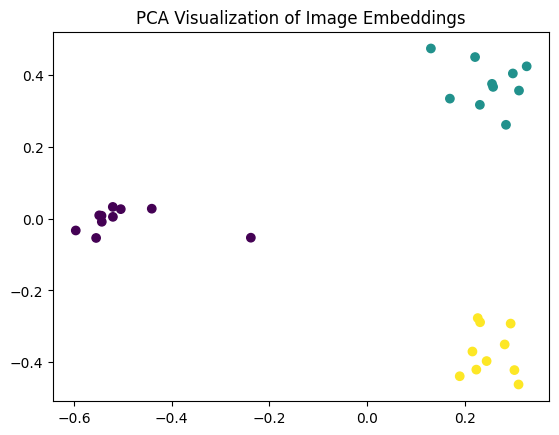

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# TODO: Implement PCA (10%)
# [HINT] Cat all the emnedding from each catafories together
# [HINT] Run PCA and display the result
pca = PCA(n_components=2)
pca.fit(all_embeddings)
pca_result = pca.transform(all_embeddings)
labels = np.concatenate((np.zeros(10), np.ones(10), 2*np.ones(10)))

# Output the result as pca_result, and labels as labels

# Plotting
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels)
plt.title('PCA Visualization of Image Embeddings')
plt.show()

Vision x Text:  tensor([[1.0000e+00, 6.1386e-07, 4.2893e-08],
        [2.3189e-05, 9.9319e-01, 6.7895e-03],
        [2.1998e-02, 5.0092e-03, 9.7299e-01]])
Dot Product Matrix:
           Dog       Car      Bird
Dog  24.359924 16.094948 12.362318
Car   9.137048 18.363531  8.193187
Bird 10.504002 10.618438 24.519131
Softmax Matrix:
          Dog      Car     Bird
Dog  0.999999 0.000001 0.000000
Car  0.000023 0.993187 0.006790
Bird 0.021998 0.005009 0.972993


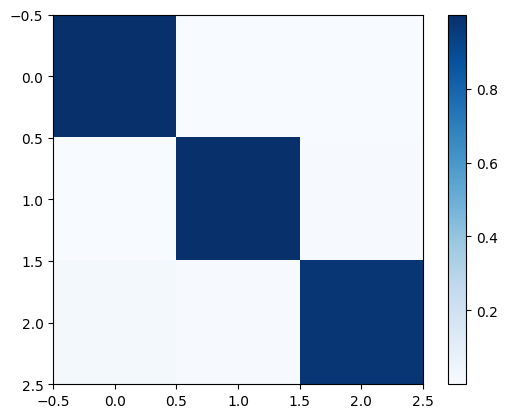

In [9]:
# Describe the pictures with your creativity! (5%)
import pandas as pd

file_path = '/content/drive/MyDrive/AI_HW1/Cat/'

# TODO: Choose one picture for each category and generates an embedding(5%)
# Please output the result as embeddings, like the sample code
image_paths=[ file_path+"/cat_with_rabbit_headwear.jpg", file_path+"/standing_cat.jpg", file_path+"/stacking_cats.jpg"]
text_list = ["A cat with rabbit headwear", "A standing cat", "Stacking Cats"]

inputs = {
    ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
}

with torch.no_grad():
    embeddings = model(inputs)

softmax_matrix = torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1).cpu()

print("Vision x Text: ", softmax_matrix)

dot_product_pd = pd.DataFrame(dot_product_matrix.cpu().numpy(), index=row_labels, columns=column_labels)
softmax_matrix_pd = pd.DataFrame(softmax_matrix.cpu().numpy(), index=row_labels, columns=column_labels)

pd.options.display.float_format = '{:.6f}'.format

print("Dot Product Matrix:")
print(dot_product_pd)

print("Softmax Matrix:")
print(softmax_matrix_pd)
import matplotlib.pyplot as plt

plt.imshow(softmax_matrix, cmap='Blues')
plt.colorbar()
plt.show()

